# ADWORDS [by Query Explorer](https://ga-dev-tools.appspot.com/query-explorer)

IF697 — Introdução à Ciência dos Dados

Prof. Dr. Luciano Barbosa

Alunos: Hywre Cesar & Rafael Albuquerque

# Introdução
Através da plataforma Query Explorer, obtivemos um dataset que une os produtos do Google (Analytics/Search Console/AdWords) com informações sobre anuncios direcionados as buscas relacionadas a Farmácia. Tratam-se de dados reais retiradas de um estudo de caso de um estabelecimento localizado em Olinda - PE por meio da ferramenta do Google Query Explorer que integra as demais feramentas que apoiam os comércios locais.

Dividimos o trabalho em etapas, sendo a primeira a de pré-processamento do dataset que consistia em: limpeza de outliers, removendo dados irrelevantes e tratando dados importantes ausentes. Apesar de subjulgada, essa etapa é uma das mais importantes pois servirá de base para as demais processamentos.

Em seguida, apresentaremos estatísticas descritivas com visualizaçcões e os teste de hipotestes levantados para o modelo de negócio proposto. Compararando categorias e sua significância, visamos extrair informações para o modelo de negócio e da importância de conhecer seu público alvo na tomada de decisões.

[**O QUE FALTA?**] Pequena exploração dos resultados e discussão

# Objetivos
Extrair dados, se valendo de estatística descritiva e testes de hipóteses, para gerar informações de importância para a microempresa, de modo, por exemplo, a caracterizar seu público alvo e com isso formar políticas e estratégias para pequenos estabelecimentos aos quais negligenciam, muitas vezes, análise de dados para nortear planos de investimentos ou corrigir falhas.

# Materiais e Métodos
Para essa análise utilizamos as ferramentas do Google tais como: Adwords, Search Console e Analytics, centralizadas pela ferramenta Query Explorer, que agrupa os dados e correlaciona-os, segundo as limitações das ferramentas, visto que nem sempre todas são disparadas ao mesmo tempo durante o evento acesso a página web.

Utilizamos a linguagem de programação Python 3.6, padrão do ambiente de desenvolvimento Google Colab, elegida  ferramenta para análises de dados pois abarca como vantagem a execução centralizada, independente de plataforma e colaborativa entre os participantes do grupo.

# Resultados e discussões


## Coleta dos dados
Como a ferramenta Query Explorer (**Bônus 1 - Extrair dados da Web**) possui limitações que impedem a exportação completa dos dados, utilizamos como chave primária a concatenação da data-hora do evento e do termo da pesquisa que acionou o evento. Com isso saímos de uma limitação de 7 colunas para 36 colunas, com incrementos de 5 colunas, visto que duas estavam ocupadas com a chave primária.

Muito dos dados foram perdidos, seja por dados truncados que comprometiam a chave primária, gerados pela própria ferramenta do Google, seja por não necessariamente gerar dados em todas as três ferramentas ao mesmo tempo, por exemplo por uma pesquisa orgânica.

Nessa etapa, saímos de um dataset de 95mil eventos para apenas cerca de 21mil, em compensação aumentamos a riqueza dos dados, adicionando colunas que identificam até o tipo de tela do usuário naquele evento. Para facilitar a interoperabilidade, convertemos os dados para csv (valores separados por vírgulas).



## Configuração do ambiente
Abaixo segue a configuração do ambiente, por meio da ferramenta Pandas. Trata-se de umma biblioteca em Python que oferece infraestrutura para manipulação dos dados e séries temporais.

Verificou-se que os dados foram importados com êxito gerando exatos 21306 linhas de dados, distribuídas em 36 colunas.  

In [ ]:
#importação do Pandas
import pandas as pd

#importação do requests para::
import requests as rqs

#desabilitando warnings para::
import warnings
warnings.filterwarnings('ignore')

if 'google.colab' in str(get_ipython()):
  dataset = pd.read_csv("https://raw.githubusercontent.com/rafaellsma/adsense-analysis/main/dataset%20210316.csv?token=AFJ2KTV22I46NJWANG74PYLAMC5XS", sep=";")
else:
  dataset = pd.read_csv("dataset 210316.csv", sep=";")

# size of dataset
print("Size of dataset is (row x col): " + str(dataset.shape) + "\npreview dos dados...")

# preview where "n = 2" is rows e 12 primeiras colunas
pd.options.display.max_columns = 12
rows = 2
dataset.head(rows)

Size of dataset is (row x col): (21306, 36)
preview dos dados...


,dateHourMinute,adMatchedQuery,city,latitude,longitude,networkDomain,...,goal1Starts,pageviews,uniquePageviews,timeOnPage,exits,pageLoadTime
0,201901150113,comprar terramicina polimixina b,Carpina,"-7,845","-35,2437",planaltonet.net.br,...,1,1,1,0,1,0
1,201901150752,remedios homeopaticos onde comprar,Recife,"-8,0522","-34,9286",(not set),...,1,3,2,23,1,0


## Preprocessamento

### Definição dos tipos
Nessa parte do trabalho, observou-se que boa parte dos tipos estão como object. Portanto, ocorrerá o ajuste para tipos mais adequados como: data-hora, string, category, float e int, dependendo da característica do dado.

In [ ]:
try:
  dataset.dateHourMinute = pd.to_datetime(dataset.dateHourMinute, format="%Y%m%d%H%M")
  dataset.adMatchedQuery = dataset.adMatchedQuery.astype('str')
  dataset.city = dataset.city.astype('category')
  dataset.latitude = dataset.latitude.astype('str').str.replace(',', '.').astype('float64')
  dataset.longitude = dataset.longitude.astype('str').str.replace(',', '.').astype('float64')
  dataset.networkDomain = dataset.networkDomain.astype('category')
  dataset.networkLocation = dataset.networkLocation.astype('category')
  dataset.flashVersion = dataset.flashVersion.astype('category')
  dataset.javaEnabled = dataset.javaEnabled.replace({True: 'Yes', False: 'No'}).astype('bool')
  dataset.language = dataset.language.astype('category')
  dataset.screenResolution = dataset.screenResolution.astype('category')
  dataset.screenName = dataset.screenName.astype('category')
  dataset.browser = dataset.browser.astype('category')
  dataset.operatingSystem = dataset.operatingSystem.astype('category')
  dataset.mobileDeviceInfo = dataset.mobileDeviceInfo.astype('category')
  dataset.adSlot = dataset.adSlot.astype('category')
  dataset.adMatchType = dataset.adMatchType.astype('category')
  dataset.adFormat = dataset.adFormat.astype('category')
  dataset.adTargetingType = dataset.adTargetingType.astype('category')
  dataset.adwordsCriteriaID = dataset.adwordsCriteriaID.astype('category')
  dataset.impressions = dataset.impressions.astype('int64')
  dataset.adClicks = dataset.adClicks.astype('int64')
  dataset.adCost = dataset.adCost.astype('str').str.replace(',', '.').astype('float64')
  dataset.CPM = dataset.CPM.astype('str').str.replace(',', '.').astype('float64')
  dataset.CPC = dataset.CPC.astype('str').str.replace(',', '.').astype('float64')
  dataset.CTR = dataset.CTR.astype('str').str.replace(',', '.').astype('float64')
  dataset.costPerConversion = dataset.costPerConversion.astype('str').str.replace(',', '.').astype('float64')
  dataset.sessionDuration = dataset.sessionDuration.astype('int64')
except:
  print("Falha na execução.")
finally:
  print("Todos os dados foram definidos.")

Todos os dados foram definidos.


### Tratamento de dados ausentes
Nesse ponto, primeiramente, utilizou-se o `.describe` para analisar todos os dados categoricos e ver quais são os que tem ou não valores para o nosso dataset. Filtramos apenas os dados categóricos, ou seja, dados que expressão um grupo ou categoria.

In [ ]:
dataset.describe(include=['category'], )

,city,networkDomain,networkLocation,flashVersion,language,screenResolution,screenName,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,adFormat,adTargetingType,adwordsCriteriaID
count,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306
unique,72,90,279,6,31,213,13,13,6,702,5,4,2,2,277
top,Olinda,(not set),(not set),(not set),pt-br,360x640,farmacia12.com.br/,Chrome,Android,Apple iPhone,Google search: Top,Broad match,Text,Keyword,10334511
freq,8271,10839,6581,21299,20777,10198,20113,18725,19885,1342,17154,14380,21287,21287,1696


A coluna city tem 72 valores distintos, isso significa que tem mais cidades do que queremos trabalhar, pois só queremos as cidades da região metropolitana do recife, então vamos filtra-las

In [ ]:
allowed_cities = [
    'Abreu e Lima', 
    'Cabo de Santo Agostinho', 
    'Camaragibe', 
    'Goiana', 
    'Igarassu', 
    'Itamaraca', 
    'Ipojuca', 
    'Itapissuma',
    'Jaboatao dos Guararapes',
    'Moreno',
    'Olinda',
    'Paulista',
    'Recife',
    'Sao Lourenco da Mata'
]

dataset = dataset[dataset.city.isin(allowed_cities)]

In [ ]:
dataset.describe(include=['category'])

,city,networkDomain,networkLocation,flashVersion,language,screenResolution,screenName,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,adFormat,adTargetingType,adwordsCriteriaID
count,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792
unique,14,64,238,6,28,201,12,13,6,667,5,4,2,2,267
top,Olinda,(not set),(not set),(not set),pt-br,360x640,farmacia12.com.br/,Chrome,Android,Apple iPhone,Google search: Top,Broad match,Text,Keyword,10334511
freq,8271,9251,6248,18785,18318,8927,17758,16545,17561,1158,14961,12644,18775,18775,1514


Temos muitos `(not set)` que são os null nas colunas `networkDomain`, `networkLocation` e `flashVersion`, e essas colunas não agregam muito ao nosso dataset, então iremos apaga-las. Temos 28 valores diferente para `language` e isso não parece fazer muito sentido, pois filtramos só por cidades da RMR, e como ela não agrega muito valor ao nosso dataset, iremos apagar-la.

Outra coluna que podemos apagar é adwordsCriteriaID, pois são id unicos gerados pelo google e para esse projeto não iremos usar-los

In [ ]:
dataset = dataset.drop(columns=['networkDomain', 'networkLocation', 'flashVersion', 'language', 'adwordsCriteriaID'])

In [ ]:
dataset.describe(include=['category'])

,city,screenResolution,screenName,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,adFormat,adTargetingType
count,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792
unique,14,201,12,13,6,667,5,4,2,2
top,Olinda,360x640,farmacia12.com.br/,Chrome,Android,Apple iPhone,Google search: Top,Broad match,Text,Keyword
freq,8271,8927,17758,16545,17561,1158,14961,12644,18775,18775


Algumas colunas tem poucos valores únicos, e iremos analisar-las usando `.value_counts()` para entender o que esse valores significam.

In [ ]:
print(dataset.screenName.value_counts())
print()
print(dataset.browser.value_counts())
print()
print(dataset.operatingSystem.value_counts())
print()
print(dataset.adSlot.value_counts())
print()
print(dataset.adMatchType.value_counts())
print()
print(dataset.adFormat.value_counts())
print()
print(dataset.adTargetingType.value_counts())
print()

farmacia12.com.br/                                                                                                                                                                                                                                                 17758
farmacia12.com.br/index2.html                                                                                                                                                                                                                                        832
farmacia12.com.br/pagar.html                                                                                                                                                                                                                                          98
farmacia12.com.br/lista_medicamento.html                                                                                                                                                                     

A partir da célula acima conseguimos observamar que algumas colunas, `screenName`, `adFormat` e `adTargetingType` tem valores unários, então podemos remover-las.

ScreenName tem valores unários pois todos esses dados são de uma única farmácia, então todos os anuncios são direcionados para o site dela. `adForma` e `adTargetingType` são uninário pois todos os anuncios são para o buscador do google e lá só se mostra o texto.

In [ ]:
dataset = dataset.drop(columns=['screenName', 'adFormat', 'adTargetingType'])

In [ ]:
dataset.describe(include=['boolean'])

,javaEnabled
count,18792
unique,1
top,True
freq,18792


Vamos olhar agora para os dados numéricos do nosso dataset e ver o que é relevante ou não, e tentar identificar erros nos nosso dados.

In [ ]:
dataset.describe(include=['number'], percentiles=[.25, .5, .75, .9, .99])

,latitude,longitude,users,impressions,adClicks,adCost,CPM,CPC,CTR,costPerConversion,sessionDuration,organicSearches,goal1Starts,pageviews,uniquePageviews,timeOnPage,exits,pageLoadTime
count,18792.00000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,1.879200e+04,18792.000000,1.879200e+04,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000
mean,-8.00488,-34.881276,1.001117,1.150649,1.003140,1.611762,3.951189e+14,0.211555,2.117012e+14,0.864692,71.284217,0.000958,0.706950,3.097435,2.014527,71.255428,0.994785,124.123138
std,0.04519,0.040569,0.033411,1.266024,0.492443,127.672850,3.594422e+15,0.118098,2.071043e+15,88.354133,187.347568,0.032610,0.468312,2.416688,1.001490,181.734060,0.187339,1701.595126
min,-8.39810,-35.104500,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.05220,-34.928600,1.000000,1.000000,1.000000,0.140000,1.200000e+02,0.130000,1.000000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,-7.99060,-34.873500,1.000000,1.000000,1.000000,0.260000,2.500000e+02,0.240000,1.000000e+02,0.144200,14.000000,0.000000,1.000000,3.000000,2.000000,14.000000,1.000000,0.000000
75%,-7.99060,-34.841700,1.000000,1.000000,1.000000,0.310000,3.100000e+02,0.300000,1.000000e+02,0.280000,58.000000,0.000000,1.000000,4.000000,2.000000,59.000000,1.000000,0.000000
90%,-7.93760,-34.841700,1.000000,2.000000,2.000000,0.380000,3.800000e+02,0.340000,2.000000e+02,0.340000,171.000000,0.000000,1.000000,6.000000,3.000000,173.000000,1.000000,0.000000
99%,-7.93760,-34.841700,1.000000,7.000000,2.000000,0.700000,1.309998e+16,0.440000,6.666670e+15,0.680000,1030.090000,0.000000,1.000000,12.000000,5.000000,989.270000,2.000000,0.000000
max,-7.56300,-34.841700,2.000000,21.000000,5.000000,12635.000000,5.783330e+16,1.030000,7.692310e+16,12058.000000,2937.000000,2.000000,3.000000,49.000000,10.000000,2937.000000,3.000000,76721.000000


`users`, como nós já esperávamos - como temos lat, lng, deviceInfo esperavamos que cada linha represetava um único usuário - é unário(1 até o p99), então decidimos em remover-la.

`CPM` e `CPC` são duas métricas de monetizacão de anúncios que decidirmos por não utilizar nesse projeto.

`CTR` é uma métrica super importante que parece está errada no nosso dataset, então iremos remover essa coluna e recalcular-la usando adClick/impressions

`organicSearches` é praticamente unário(0 até o p99), então nós decidimos em remover-la.

`goal1Starts` é praticamente unário(0 até o p99), então nós decidimos em remover-la.

`uniquePageviews` é uma coluna que não compreendemos bem, então optamos por remover-la

`exits` tem uma distribuição muito parecida com `adClicks`, então optamos por remover-la e a nossa taxa de rejeição sera baseado pelo tempo na página.

`pageLoadTime` foi uma decepção para o projeto, pois estavamos esperançoso para relacionar a taxa de rejeição com o tempo para carregar a pagina, mas temos menos de 1% de instancias com valores diferentes de 0. Vamos remover-la também


In [ ]:
dataset = dataset.drop(columns=['users', 'CPM', 'CPC', 'CTR', 'organicSearches', 'goal1Starts', 'uniquePageviews', 'exits', 'pageLoadTime'])

In [ ]:
dataset['ctr'] = dataset.adClicks.divide(dataset.impressions, fill_value=0) # quando não temos impressões o CTR é 0

In [ ]:
dataset.describe(include='all', datetime_is_numeric=True)

,dateHourMinute,adMatchedQuery,city,latitude,longitude,javaEnabled,screenResolution,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,impressions,adClicks,adCost,costPerConversion,sessionDuration,pageviews,timeOnPage,ctr
count,18792,18792,18792,18792.00000,18792.000000,18792,18792,18792,18792,18792,18792,18792,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,16745.000000
unique,NaN,11952,14,NaN,NaN,1,201,13,6,667,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,farmacia pague menos,Olinda,NaN,NaN,True,360x640,Chrome,Android,Apple iPhone,Google search: Top,Broad match,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,344,8271,NaN,NaN,18792,8927,16545,17561,1158,14961,12644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019-10-26 04:14:34.144325888,NaN,NaN,-8.00488,-34.881276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150649,1.003140,1.611762,0.864692,71.284217,3.097435,71.255428,1.025961
min,2019-01-15 07:52:00,NaN,NaN,-8.39810,-35.104500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2019-04-22 21:28:15,NaN,NaN,-8.05220,-34.928600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.140000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2019-08-10 15:43:00,NaN,NaN,-7.99060,-34.873500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.260000,0.144200,14.000000,3.000000,14.000000,1.000000
75%,2020-04-12 21:11:45,NaN,NaN,-7.99060,-34.841700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.310000,0.280000,58.000000,4.000000,59.000000,1.000000
max,2021-03-13 22:45:00,NaN,NaN,-7.56300,-34.841700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,5.000000,12635.000000,12058.000000,2937.000000,49.000000,2937.000000,3.000000


Uma coluna que quase passou despercebida foi `javaEnabled`, ela está completamente setada como true, então iremos remover-la.

In [ ]:
dataset = dataset.drop(columns=['javaEnabled'])

Iremos remover todos os `(not set)` de colunas categoricas ou object

In [ ]:
print(dataset.shape)
for column in dataset.columns:
    if dataset.dtypes[column].name == 'category' or dataset.dtypes[column].name == 'object':
        dataset = dataset[(dataset[column] != '(not set)')]
        if dataset.dtypes[column].name == 'category':
            dataset[column].cat.remove_unused_categories()
print(dataset.shape)
dataset.reset_index(drop=True, inplace=True)

(18792, 19)
(18158, 19)


Agora vamos discretizar o `screenResolution` em 4 bins: small, medium, large, xlarge

In [ ]:
def transformScreenResolutionInDPI(resolution):
    x = resolution.split('x')
    if len(x) > 1:
        return int(x[0]) * int(x[1])
    return 0
    
dataset['screenResolutionDist'] = pd.cut(dataset.screenResolution.apply(transformScreenResolutionInDPI), 4, labels=['small', 'medium', 'large', 'xlarge'])

Com a lat/lng iremos usar um geocoding reverso para trazer a granularidade de bairro(locality) para o dataset

In [ ]:
cache = dict()

def getLocality(*args):
    if args in cache:
        return cache[args]
    rq = rqs.get(f'https://api.bigdatacloud.net/data/reverse-geocode-client?latitude={args[0]}&longitude={args[1]}&localityLanguage=pt')
    result = rq.json()['locality']
    cache[args] = result
    return result

dataset['locality'] = dataset.apply(lambda x: getLocality(x.latitude, x.longitude), axis=1)

In [ ]:
dataset = dataset.drop(columns=['latitude', 'longitude'])

In [ ]:
dataset.head()

,dateHourMinute,adMatchedQuery,city,screenResolution,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,impressions,adClicks,adCost,costPerConversion,sessionDuration,pageviews,timeOnPage,ctr,screenResolutionDist,locality
0,2019-01-15 07:53:00,farmácia são paulo olinda estoque,Recife,360x640,Chrome,Android,Motorola Moto G (4) Moto G4,Google search: Top,Phrase match,1,1,0.27,0.00,0,1,0,1.0,small,Cordeiro
1,2019-01-15 07:54:00,farmacia independente olinda,Olinda,360x640,Chrome,Android,Samsung SM-A520F Galaxy A5 (2017),Google search: Top,Broad match,1,1,0.27,0.27,15,3,15,1.0,small,Casa Caiada
2,2019-01-15 08:12:00,vick baby rub comprar,Olinda,360x640,Chrome,Android,Samsung SM-G531H Galaxy Grand Prime,Google search: Other,Broad match,1,1,0.23,0.23,276,13,276,1.0,small,Casa Caiada
3,2019-01-15 08:50:00,lacday similar,Recife,320x569,Chrome,Android,Samsung SM-G570M J5 Prime,Google search: Top,Phrase match,1,1,0.27,0.27,38,3,38,1.0,small,Cordeiro
4,2019-01-15 08:58:00,hemitartarato de rivastigmina de 3 grama,Olinda,360x640,Chrome,Android,Samsung SM-G531BT Galaxy Grand Prime,Google search: Top,Broad match,0,0,0.00,0.00,10,2,10,NaN,small,Casa Caiada


In [ ]:
print(dataset.locality.value_counts())
print(dataset.city.value_counts())

Casa Caiada                  8052
Cordeiro                     6809
Paulista                     3077
Abreu e Lima                   49
Igarassu                       44
São Lourenço da Mata           36
Piedade                        35
Camaragibe                     18
Centro                         16
Ipojuca                         7
Cidade Criança Área Rural       6
Goiana                          4
Moreno                          4
Ilha de Itamaracá               1
Name: locality, dtype: int64
Olinda                      8052
Recife                      6809
Paulista                    3077
Abreu e Lima                  49
Igarassu                      44
Sao Lourenco da Mata          36
Jaboatao dos Guararapes       35
Camaragibe                    18
Cabo de Santo Agostinho       16
Ipojuca                        7
Itapissuma                     6
Goiana                         4
Moreno                         4
Itamaraca                      1
Gravata                        0


Como podemos ver na célula acima, todas a lat/lng são unicas por cidade. Tentamos entender o que ouve, mas ja chegou assim do analytics para gente. Acreditamos que seja algum mecanismo para preservar a privacidade do usuário.

Removendo duplicados do dataset

In [ ]:
print(dataset.shape)
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

(18158, 19)
(18158, 19)


In [ ]:
dataset.ctr = dataset.ctr.fillna(0)

In [ ]:
dataset.head()

,dateHourMinute,adMatchedQuery,city,screenResolution,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,impressions,adClicks,adCost,costPerConversion,sessionDuration,pageviews,timeOnPage,ctr,screenResolutionDist,locality
0,2019-01-15 07:53:00,farmácia são paulo olinda estoque,Recife,360x640,Chrome,Android,Motorola Moto G (4) Moto G4,Google search: Top,Phrase match,1,1,0.27,0.00,0,1,0,1.0,small,Cordeiro
1,2019-01-15 07:54:00,farmacia independente olinda,Olinda,360x640,Chrome,Android,Samsung SM-A520F Galaxy A5 (2017),Google search: Top,Broad match,1,1,0.27,0.27,15,3,15,1.0,small,Casa Caiada
2,2019-01-15 08:12:00,vick baby rub comprar,Olinda,360x640,Chrome,Android,Samsung SM-G531H Galaxy Grand Prime,Google search: Other,Broad match,1,1,0.23,0.23,276,13,276,1.0,small,Casa Caiada
3,2019-01-15 08:50:00,lacday similar,Recife,320x569,Chrome,Android,Samsung SM-G570M J5 Prime,Google search: Top,Phrase match,1,1,0.27,0.27,38,3,38,1.0,small,Cordeiro
4,2019-01-15 08:58:00,hemitartarato de rivastigmina de 3 grama,Olinda,360x640,Chrome,Android,Samsung SM-G531BT Galaxy Grand Prime,Google search: Top,Broad match,0,0,0.00,0.00,10,2,10,0.0,small,Casa Caiada


### Numero de cliques

<AxesSubplot:xlabel='adClicks', ylabel='Count'>

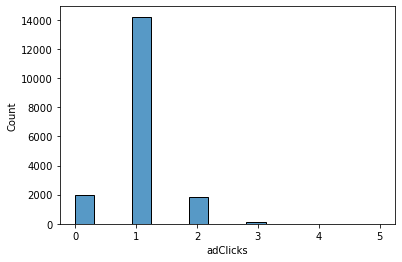

In [ ]:
sbn.histplot(dataset.adClicks)

### Distribuição preço dos anuncios

<AxesSubplot:xlabel='adCost', ylabel='Density'>

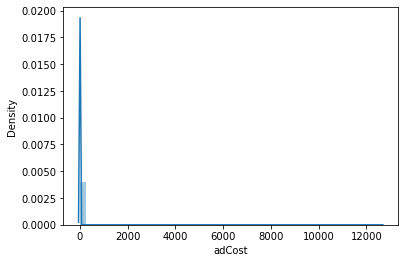

In [ ]:
sbn.distplot(dataset.adCost)

<AxesSubplot:xlabel='adCost', ylabel='Density'>

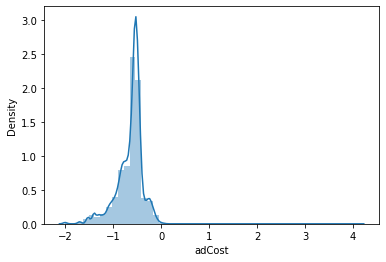

In [ ]:
x = dataset[dataset.adCost > 0].adCost
sbn.distplot(x.apply(log10))

### Preço médio de anúncio por cidade

<AxesSubplot:ylabel='city'>

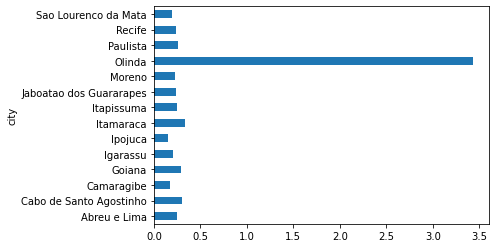

In [ ]:
dataset.groupby(by='city').mean().adCost.dropna().plot.barh()

### Preço do anúncio por tempo na página

<AxesSubplot:xlabel='adCost', ylabel='timeOnPage'>

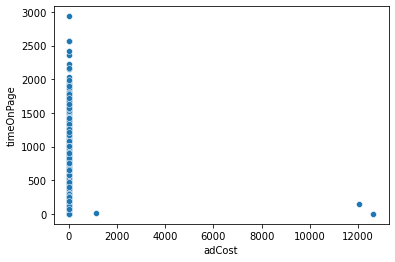

In [ ]:
sbn.scatterplot(x=dataset.adCost, y=dataset.timeOnPage)

<AxesSubplot:xlabel='adCost', ylabel='timeOnPage'>

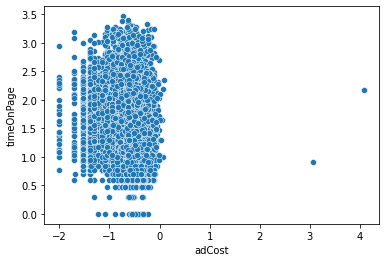

In [ ]:
x = dataset[dataset.adCost > 0].adCost
y = dataset[dataset.timeOnPage > 0].timeOnPage
sbn.scatterplot(x=x.apply(log10), y=y.apply(log10))

Não existe correlação entre o tempo na página e o preço do anuncio

### Distribuição tempo na página

<AxesSubplot:xlabel='timeOnPage', ylabel='Density'>

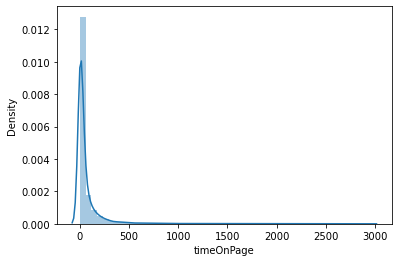

In [ ]:
sbn.distplot(dataset.timeOnPage)

<AxesSubplot:ylabel='Density'>

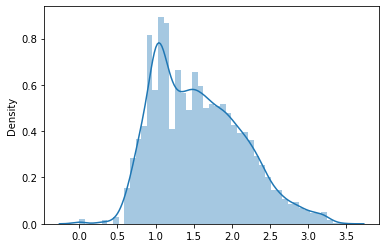

In [ ]:
x = dataset[dataset.timeOnPage > 0].timeOnPage
sbn.distplot(x=x.apply(log10))

### Tempo na página por resolução de tela

<AxesSubplot:ylabel='screenResolutionDist'>

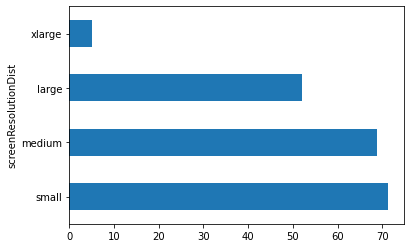

In [ ]:
dataset.groupby(by='screenResolutionDist').mean().timeOnPage.dropna().plot.barh()

### Tempo na página por sistema operacional

<AxesSubplot:ylabel='operatingSystem'>

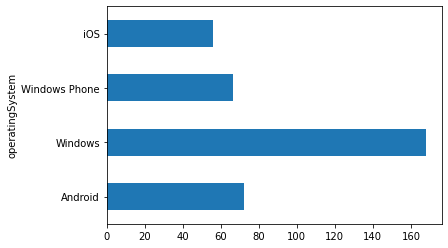

In [ ]:
dataset.groupby(by='operatingSystem').mean().timeOnPage.dropna().plot.barh() # REMOVER OUTLIER

### Preço de anuncio por sistema operacional

<AxesSubplot:ylabel='operatingSystem'>

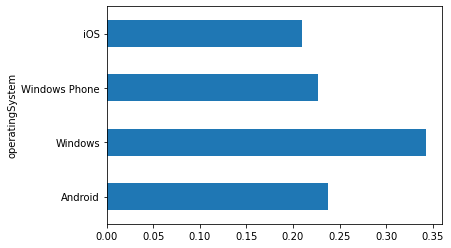

In [ ]:
dataset[dataset.adCost < 1].groupby(by='operatingSystem').mean().adCost.dropna().plot.barh() # REMOVER OUTLIER

### Pagina vistar por tempo médio na pagina

<AxesSubplot:ylabel='pageviews'>

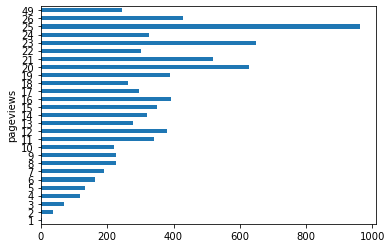

In [ ]:
dataset.groupby(by='pageviews').mean().timeOnPage.dropna().plot.barh()